In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


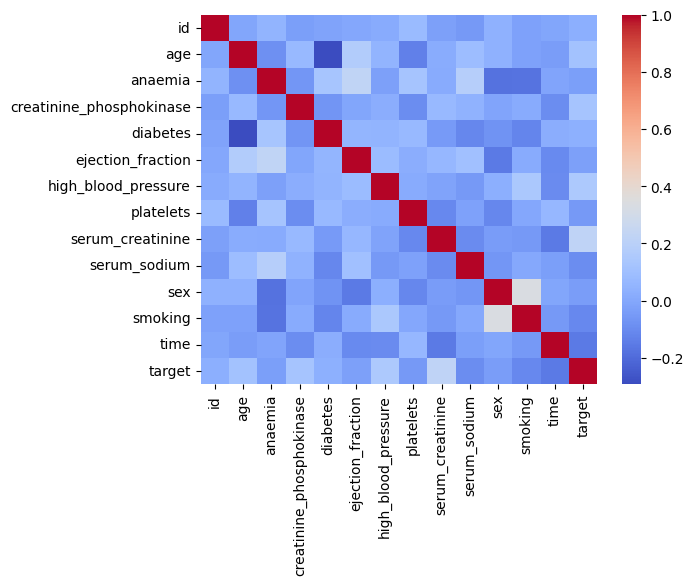

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


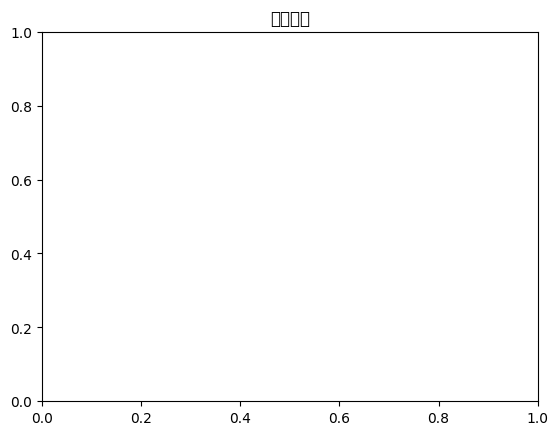

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 訓練データのCSVファイルを読み込む
data = pd.read_csv('drive/MyDrive/心不全予測/train.csv')

# 特徴量とターゲット変数にデータを分割
#X_train = data.drop(['id','target'], axis=1)
#y_train = data['target']
X_train = dtrain.toarray(data.drop(['id','target'], axis=1))  # DMatrixをNumPy配列に変換
y_train = dtrain.get_label(data['target'])  # DMatrixからラベルを抽出
# ターゲット変数のバイナリ化
data['target'] = data['target'].map({0: 0, 1: 1})

# 相関行列の計算
correlation_matrix = data.corr()

# ヒートマップの描画 (図のサイズを大きくする)
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

# グラフのタイトルと表示
plt.title('相関行列')
plt.show()



**ハイパーパラメータの範囲をランダムサーチ用に設定**

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint  # Import both uniform and randint

import pandas as pd
import xgboost as xgb

# ... rest of your code ...

# チューニングしたいハイパーパラメータの分布
param_distributions = {
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 7),
    'gamma': uniform(0.01, 0.1),
    'reg_alpha': uniform(0.01, 1.0),
    'reg_lambda': uniform(0.01, 1.0),
}


**RandomizedSearchCVを使ってハイパーパラメータを自動的にチューニン**

In [11]:
# モデルと評価指標を定義
model = xgb.XGBClassifier()
scoring = 'roc_auc'

# ランダムサーチの実行
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, scoring=scoring, n_iter=100)
random_search.fit(X_train, y_train)

# 最適なハイパーパラメータの取得
best_params = random_search.best_params_
best_score = random_search.best_score_
print(f"最適なハイパーパラメータ: {best_params}")
print(f"最適なスコア: {best_score}")


最適なハイパーパラメータ: {'gamma': 0.050816112820911925, 'learning_rate': 0.09827086127321671, 'max_depth': 5, 'n_estimators': 493, 'reg_alpha': 0.36355904838067044, 'reg_lambda': 0.36662851436054245}
最適なスコア: 0.8800782369804108


**最適なハイパーパラメータを使ってモデルを再トレーニング**

In [12]:
# 最適なハイパーパラメータを使ってモデルを再トレーニング
bst = xgb.XGBClassifier(**best_params)
bst.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.050816112820911925, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.09827086127321671, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=493, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**テストデータで予測を行い、結果をCSVファイルに保存
**

In [19]:
# テストデータのCSVファイルを読み込む
test_df = pd.read_csv('drive/MyDrive/心不全予測/test.csv')

# テストデータから特徴量を取得
X_test = test_df.drop('id', axis=1)

# XGBoost用のデータセットを作成
dtest = xgb.DMatrix(X_test)

# テストデータの予測
y_pred_proba = bst.predict(dtest)
#y_pred_proba = bst.predict(X_test)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred_proba]

# 予測結果を持つDataFrameを作成
submission_df = pd.DataFrame({
    'index': test_df['id'],  # テストデータのインデックス
    'prediction': y_pred        # 予測結果
})

# CSVファイルとして保存（ヘッダ無し）
submission_df.to_csv('drive/MyDrive/心不全予測/XGBoost_最適化.csv', header=False, index=False)


/usr/local/lib/python3.10/dist-packages/xgboost/data.py:1037: UserWarning: Unknown data type: <class 'xgboost.core.DMatrix'>, trying to convert it to csr_matrix
  warnings.warn(


TypeError: Not supported type for data.<class 'xgboost.core.DMatrix'>

In [16]:
df = pd.read_csv('drive/MyDrive/心不全予測/predictions2.csv')

In [18]:
print(df.head())

   1  0
0  2  1
1  4  0
2  5  0
3  6  0
4  8  0


In [20]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np

# 1. データの読み込み
data_path = 'drive/MyDrive/心不全予測/train.csv'  # データファイルのパス
train_df = pd.read_csv(data_path)

# 2. データの前処理
X_train = train_df.drop(['id', 'target'], axis=1)  # ラベル列とID列を除外
y_train = train_df['target']  # ラベル列を抽出

# 3. XGBoost DMatrixの作成（オプション、後の予測用）
dtrain = xgb.DMatrix(X_train, label=y_train)  # 後の予測に使用可能

# 4. XGBoostパラメータの定義（基本例）
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# 5. ハイパーパラメータ探索空間の定義（分布）
param_distributions = {
    'learning_rate': uniform(0.01, 0.1),  # 学習率範囲
    'n_estimators': randint(100, 1000),    # 推定器の数範囲
    'max_depth': randint(3, 7)             # 最大深度範囲
}

# 必要に応じて、ハイパーパラメータと分布をさらに追加できます

# 6. DMatrixからXとyを分離（scikit-learnとの互換性のため）
X_train = dtrain.toarray()  # DMatrixをNumPy配列に変換
y_train = dtrain.get_label()  # DMatrixからラベルを抽出

# 7. 交差検証付きRandomizedSearchCVの実行
n_folds = 5  # 交差検証のフォールド数設定
cv = RandomizedSearchCV(xgb.XGBClassifier(**params), param_distributions, scoring='roc_auc', cv=n_folds, n_iter=100)
cv.fit(X_train, y_train)

# 8. 最適なハイパーパラメータとスコアを取得
best_params = cv.best_params_
best_score = cv.best_score_
print(f"最適なハイパーパラメータ：{best_params}")
print(f"最適なスコア（交差検証）：{best_score}")

# 9. 最適なハイパーパラメータを持つXGBoostモデルの訓練（オプション）
# RandomizedSearchCV（cv.best_estimator_）からのモデルを使用するか、
# 予測のみを目的とする場合は、ここで別途XGBoostモデルを訓練することができます


AttributeError: 'DMatrix' object has no attribute 'toarray'

In [27]:
# Optunaをインストール
!pip install optuna

import pandas as pd
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 訓練データのCSVファイルを読み込む
train_df = pd.read_csv('drive/MyDrive/心不全予測/train.csv')

# 特徴量とターゲット変数にデータを分割
X_train = train_df.drop(['id', 'target'], axis=1)
y_train = train_df['target']

# データを訓練用と検証用に分割
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# XGBoost用のデータセットを作成
dtrain_split = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val, label=y_val)

# Objective関数の定義
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'error',
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100)
    }

    # モデルのトレーニング
    bst = xgb.train(params, dtrain_split, num_boost_round=100, evals=[(dval, 'eval')], early_stopping_rounds=10, verbose_eval=False)

    # 検証データの予測
    y_pred_proba = bst.predict(dval)
    y_pred = [1 if p >= 0.5 else 0 for p in y_pred_proba]

    # 精度を評価
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Trial {trial.number}: Validation accuracy = {accuracy}")

    return accuracy

# Optunaの最適化
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 最適化されたハイパーパラメータの表示
best_params = study.best_params
print("Best params:", best_params)

# 最適化されたハイパーパラメータでモデルのトレーニング
best_bst = xgb.train(best_params, dtrain_split, num_boost_round=100)




[I 2024-04-17 18:07:52,743] A new study created in memory with name: no-name-bfc84c55-e93f-483c-8d45-c309e26b6faa
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:52,779] Trial 0 finished with value: 0.885 and parameters: {'max_depth': 2, 'n_estimators': 100}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:52,806] Trial 1 finished with value: 0.855 and parameters: {'max_depth': 6, 'n_estimators': 700}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not u

Trial 0: Validation accuracy = 0.885
Trial 1: Validation accuracy = 0.855
Trial 2: Validation accuracy = 0.885
Trial 3: Validation accuracy = 0.865
Trial 4: Validation accuracy = 0.835
Trial 5: Validation accuracy = 0.865


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:53,020] Trial 6 finished with value: 0.85 and parameters: {'max_depth': 8, 'n_estimators': 100}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:53,068] Trial 7 finished with value: 0.85 and parameters: {'max_depth': 10, 'n_estimators': 1000}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:53,105] Trial 8 finished with value: 0.865 and parame

Trial 6: Validation accuracy = 0.85
Trial 7: Validation accuracy = 0.85
Trial 8: Validation accuracy = 0.865
Trial 9: Validation accuracy = 0.865
Trial 10: Validation accuracy = 0.835


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:53,230] Trial 11 finished with value: 0.885 and parameters: {'max_depth': 3, 'n_estimators': 400}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:53,266] Trial 12 finished with value: 0.885 and parameters: {'max_depth': 3, 'n_estimators': 300}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:53,306] Trial 13 finished with value: 0.885 and par

Trial 11: Validation accuracy = 0.885
Trial 12: Validation accuracy = 0.885
Trial 13: Validation accuracy = 0.885
Trial 14: Validation accuracy = 0.865
Trial 15: Validation accuracy = 0.885


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:53,464] Trial 16 finished with value: 0.87 and parameters: {'max_depth': 4, 'n_estimators': 100}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:53,507] Trial 17 finished with value: 0.855 and parameters: {'max_depth': 6, 'n_estimators': 600}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:53,554] Trial 18 finished with value: 0.885 and para

Trial 16: Validation accuracy = 0.87
Trial 17: Validation accuracy = 0.855
Trial 18: Validation accuracy = 0.885
Trial 19: Validation accuracy = 0.87
Trial 20: Validation accuracy = 0.865


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:53,693] Trial 21 finished with value: 0.885 and parameters: {'max_depth': 3, 'n_estimators': 400}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:53,742] Trial 22 finished with value: 0.885 and parameters: {'max_depth': 2, 'n_estimators': 400}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:53,790] Trial 23 finished with value: 0.87 and para

Trial 21: Validation accuracy = 0.885
Trial 22: Validation accuracy = 0.885
Trial 23: Validation accuracy = 0.87
Trial 24: Validation accuracy = 0.835
Trial 25: Validation accuracy = 0.885


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:53,957] Trial 26 finished with value: 0.885 and parameters: {'max_depth': 2, 'n_estimators': 400}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:54,007] Trial 27 finished with value: 0.87 and parameters: {'max_depth': 4, 'n_estimators': 800}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:54,054] Trial 28 finished with value: 0.865 and para

Trial 26: Validation accuracy = 0.885
Trial 27: Validation accuracy = 0.87
Trial 28: Validation accuracy = 0.865
Trial 29: Validation accuracy = 0.885
Trial 30: Validation accuracy = 0.865


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:54,201] Trial 31 finished with value: 0.885 and parameters: {'max_depth': 3, 'n_estimators': 300}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:54,246] Trial 32 finished with value: 0.885 and parameters: {'max_depth': 3, 'n_estimators': 300}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:54,286] Trial 33 finished with value: 0.835 and par

Trial 31: Validation accuracy = 0.885
Trial 32: Validation accuracy = 0.885
Trial 33: Validation accuracy = 0.835
Trial 34: Validation accuracy = 0.87
Trial 35: Validation accuracy = 0.885


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:54,449] Trial 36 finished with value: 0.885 and parameters: {'max_depth': 2, 'n_estimators': 500}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:54,502] Trial 37 finished with value: 0.855 and parameters: {'max_depth': 6, 'n_estimators': 200}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:54,539] Trial 38 finished with value: 0.835 and par

Trial 36: Validation accuracy = 0.885
Trial 37: Validation accuracy = 0.855
Trial 38: Validation accuracy = 0.835
Trial 39: Validation accuracy = 0.865
Trial 40: Validation accuracy = 0.885


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:54,690] Trial 41 finished with value: 0.885 and parameters: {'max_depth': 3, 'n_estimators': 500}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:54,740] Trial 42 finished with value: 0.87 and parameters: {'max_depth': 4, 'n_estimators': 500}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:54,792] Trial 43 finished with value: 0.885 and para

Trial 41: Validation accuracy = 0.885
Trial 42: Validation accuracy = 0.87
Trial 43: Validation accuracy = 0.885
Trial 44: Validation accuracy = 0.885
Trial 45: Validation accuracy = 0.835


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:54,958] Trial 46 finished with value: 0.885 and parameters: {'max_depth': 2, 'n_estimators': 500}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:55,024] Trial 47 finished with value: 0.85 and parameters: {'max_depth': 10, 'n_estimators': 400}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:55,073] Trial 48 finished with value: 0.87 and para

Trial 46: Validation accuracy = 0.885
Trial 47: Validation accuracy = 0.85
Trial 48: Validation accuracy = 0.87
Trial 49: Validation accuracy = 0.865


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:55,184] Trial 50 finished with value: 0.885 and parameters: {'max_depth': 2, 'n_estimators': 700}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:55,234] Trial 51 finished with value: 0.885 and parameters: {'max_depth': 2, 'n_estimators': 600}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:55,279] Trial 52 finished with value: 0.885 and par

Trial 50: Validation accuracy = 0.885
Trial 51: Validation accuracy = 0.885
Trial 52: Validation accuracy = 0.885
Trial 53: Validation accuracy = 0.885
Trial 54: Validation accuracy = 0.835


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:55,427] Trial 55 finished with value: 0.87 and parameters: {'max_depth': 4, 'n_estimators': 500}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:55,482] Trial 56 finished with value: 0.885 and parameters: {'max_depth': 3, 'n_estimators': 400}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:55,530] Trial 57 finished with value: 0.885 and para

Trial 55: Validation accuracy = 0.87
Trial 56: Validation accuracy = 0.885
Trial 57: Validation accuracy = 0.885
Trial 58: Validation accuracy = 0.885


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:55,655] Trial 59 finished with value: 0.85 and parameters: {'max_depth': 8, 'n_estimators': 200}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:55,709] Trial 60 finished with value: 0.87 and parameters: {'max_depth': 4, 'n_estimators': 500}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:55,769] Trial 61 finished with value: 0.885 and param

Trial 59: Validation accuracy = 0.85
Trial 60: Validation accuracy = 0.87
Trial 61: Validation accuracy = 0.885
Trial 62: Validation accuracy = 0.835
Trial 63: Validation accuracy = 0.885


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:55,855] Trial 63 finished with value: 0.885 and parameters: {'max_depth': 3, 'n_estimators': 400}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:55,908] Trial 64 finished with value: 0.885 and parameters: {'max_depth': 2, 'n_estimators': 600}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:55,974] Trial 65 finished with value: 0.885 and par

Trial 64: Validation accuracy = 0.885
Trial 65: Validation accuracy = 0.885
Trial 66: Validation accuracy = 0.885
Trial 67: Validation accuracy = 0.835


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:56,131] Trial 68 finished with value: 0.885 and parameters: {'max_depth': 2, 'n_estimators': 500}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:56,184] Trial 69 finished with value: 0.87 and parameters: {'max_depth': 4, 'n_estimators': 200}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:56,226] Trial 70 finished with value: 0.885 and para

Trial 68: Validation accuracy = 0.885
Trial 69: Validation accuracy = 0.87
Trial 70: Validation accuracy = 0.885
Trial 71: Validation accuracy = 0.885
Trial 72: Validation accuracy = 0.885


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:56,380] Trial 73 finished with value: 0.87 and parameters: {'max_depth': 4, 'n_estimators': 400}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:56,448] Trial 74 finished with value: 0.885 and parameters: {'max_depth': 2, 'n_estimators': 300}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:56,528] Trial 75 finished with value: 0.885 and para

Trial 73: Validation accuracy = 0.87
Trial 74: Validation accuracy = 0.885
Trial 75: Validation accuracy = 0.885


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:56,611] Trial 76 finished with value: 0.835 and parameters: {'max_depth': 1, 'n_estimators': 300}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:56,722] Trial 77 finished with value: 0.87 and parameters: {'max_depth': 4, 'n_estimators': 400}. Best is trial 0 with value: 0.885.


Trial 76: Validation accuracy = 0.835
Trial 77: Validation accuracy = 0.87


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:56,879] Trial 78 finished with value: 0.885 and parameters: {'max_depth': 2, 'n_estimators': 1000}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:57,074] Trial 79 finished with value: 0.885 and parameters: {'max_depth': 3, 'n_estimators': 200}. Best is trial 0 with value: 0.885.


Trial 78: Validation accuracy = 0.885
Trial 79: Validation accuracy = 0.885


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:57,842] Trial 80 finished with value: 0.885 and parameters: {'max_depth': 2, 'n_estimators': 100}. Best is trial 0 with value: 0.885.


Trial 80: Validation accuracy = 0.885


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:58,156] Trial 81 finished with value: 0.885 and parameters: {'max_depth': 2, 'n_estimators': 400}. Best is trial 0 with value: 0.885.


Trial 81: Validation accuracy = 0.885


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:58,601] Trial 82 finished with value: 0.885 and parameters: {'max_depth': 3, 'n_estimators': 300}. Best is trial 0 with value: 0.885.


Trial 82: Validation accuracy = 0.885


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:58,848] Trial 83 finished with value: 0.835 and parameters: {'max_depth': 1, 'n_estimators': 500}. Best is trial 0 with value: 0.885.


Trial 83: Validation accuracy = 0.835


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:59,194] Trial 84 finished with value: 0.885 and parameters: {'max_depth': 2, 'n_estimators': 400}. Best is trial 0 with value: 0.885.


Trial 84: Validation accuracy = 0.885


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:59,418] Trial 85 finished with value: 0.885 and parameters: {'max_depth': 3, 'n_estimators': 500}. Best is trial 0 with value: 0.885.


Trial 85: Validation accuracy = 0.885


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:07:59,681] Trial 86 finished with value: 0.865 and parameters: {'max_depth': 5, 'n_estimators': 300}. Best is trial 0 with value: 0.885.


Trial 86: Validation accuracy = 0.865


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:07:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:08:00,022] Trial 87 finished with value: 0.885 and parameters: {'max_depth': 2, 'n_estimators': 600}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:08:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:08:00,064] Trial 88 finished with value: 0.885 and parameters: {'max_depth': 3, 'n_estimators': 400}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:08:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:08:00,115] Trial 89 finished with value: 0.865 and par

Trial 87: Validation accuracy = 0.885
Trial 88: Validation accuracy = 0.885
Trial 89: Validation accuracy = 0.865
Trial 90: Validation accuracy = 0.87


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:08:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:08:00,229] Trial 91 finished with value: 0.885 and parameters: {'max_depth': 3, 'n_estimators': 500}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:08:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:08:00,278] Trial 92 finished with value: 0.885 and parameters: {'max_depth': 2, 'n_estimators': 600}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:08:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:08:00,324] Trial 93 finished with value: 0.885 and par

Trial 91: Validation accuracy = 0.885
Trial 92: Validation accuracy = 0.885
Trial 93: Validation accuracy = 0.885
Trial 94: Validation accuracy = 0.885
Trial 95: Validation accuracy = 0.835


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:08:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:08:00,479] Trial 96 finished with value: 0.87 and parameters: {'max_depth': 4, 'n_estimators': 500}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:08:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:08:00,523] Trial 97 finished with value: 0.885 and parameters: {'max_depth': 3, 'n_estimators': 200}. Best is trial 0 with value: 0.885.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:08:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-04-17 18:08:00,574] Trial 98 finished with value: 0.885 and para

Trial 96: Validation accuracy = 0.87
Trial 97: Validation accuracy = 0.885
Trial 98: Validation accuracy = 0.885
Trial 99: Validation accuracy = 0.885
Best params: {'max_depth': 2, 'n_estimators': 100}


In [28]:
# テストデータのCSVファイルを読み込む
test_df = pd.read_csv('drive/MyDrive/心不全予測/test.csv')

# テストデータから特徴量を取得
X_test = test_df.drop('id', axis=1)

# XGBoost用のデータセットを作成
dtest = xgb.DMatrix(X_test)

# テストデータの予測
y_pred_proba = best_bst.predict(dtest)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred_proba]

# 予測結果を持つDataFrameを作成
submission_df = pd.DataFrame({
    'index': test_df['id'],  # テストデータのインデックス
    'prediction': y_pred        # 予測結果
})

# CSVファイルとして保存（ヘッダ無し）
submission_df.to_csv('drive/MyDrive/心不全予測/predictions_optuna.csv', header=False, index=False)


In [ ]:
# Optunaをインストール
!pip install optuna

import pandas as pd
import xgboost as xgb
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 訓練データのCSVファイルを読み込む
train_df = pd.read_csv('drive/MyDrive/心不全予測/train.csv')

# 特徴量とターゲット変数にデータを分割
X_train = train_df.drop(['id', 'target'], axis=1)
y_train = train_df['target']

# データを訓練用と検証用に分割
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# XGBoost用のデータセットを作成
dtrain_split = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val, label=y_val)

# Objective関数の定義
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'error',
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100)
    }

    # モデルのトレーニング
    bst = xgb.train(params, dtrain_split, num_boost_round=100, evals=[(dval, 'eval')], early_stopping_rounds=10, verbose_eval=False)

    # 検証データの予測
    y_pred_proba = bst.predict(dval)
    y_pred = [1 if p >= 0.5 else 0 for p in y_pred_proba]

    # 精度を評価
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy

# Optunaの最適化
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 最適化されたハイパーパラメータの表示
best_params = study.best_params
print("Best params:", best_params)

# 最適化されたハイパーパラメータでモデルのトレーニング
best_bst = xgb.train(best_params, dtrain_split, num_boost_round=100)
